In [109]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
# CDNOW_master.txt


### 第一部分：数据类型处理
- 数据加载
    - 字段含义：
        - user_id:用户ID
        - order_dt:购买日期
        - order_product:购买产品的数量
        - order_amount:购买金额
- 观察数据
    - 查看数据的数据类型
    - 数据中是否存储在缺失值
    - 将order_dt转换成时间类型
    - 查看数据的统计描述
        - 计算所有用户购买商品的平均数量
        - 计算所有用户购买商品的平均花费
    - 在源数据中添加一列表示月份:astype("datetime64[M]")

In [110]:
# 数据的加载
df = pd.read_csv(
    "../data/CDNOW_master.txt",
    header=None,
    sep="\s+",
    names=["user_id","order_dt","order_product","order_amount"]
)
df

,user_id,order_dt,order_product,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
...,...,...,...,...
69654,23568,19970405,4,83.74
69655,23568,19970422,1,14.99
69656,23569,19970325,2,25.74
69657,23570,19970325,3,51.12


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        69659 non-null  int64  
 1   order_dt       69659 non-null  int64  
 2   order_product  69659 non-null  int64  
 3   order_amount   69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [112]:
# 将order_dt转换成时间类型
df["order_dt"] = pd.to_datetime(df["order_dt"], format="%Y%m%d")
df

,user_id,order_dt,order_product,order_amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
...,...,...,...,...
69654,23568,1997-04-05,4,83.74
69655,23568,1997-04-22,1,14.99
69656,23569,1997-03-25,2,25.74
69657,23570,1997-03-25,3,51.12


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        69659 non-null  int64         
 1   order_dt       69659 non-null  datetime64[ns]
 2   order_product  69659 non-null  int64         
 3   order_amount   69659 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [114]:
# 查看数据的统计描述
df.describe()

,user_id,order_product,order_amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


In [115]:
# 基于order_dt取出其中的月份
df["order_dt"].astype("datetime64[M]")

0       1997-01-01
1       1997-01-01
2       1997-01-01
3       1997-01-01
4       1997-03-01
           ...    
69654   1997-04-01
69655   1997-04-01
69656   1997-03-01
69657   1997-03-01
69658   1997-03-01
Name: order_dt, Length: 69659, dtype: datetime64[ns]

In [116]:
# 在源数据中添加一列表示月份:astype("datetime64[M]")
df["month"] = df["order_dt"].astype("datetime64[M]")
df.head()

,user_id,order_dt,order_product,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


### 第二部分：按月数据分析
- 用户每月花费的总金额
    - 绘制曲线图展示
- 所有用户每月的产品购买量
- 所有用户每月的消费总次数
- 统计每月的消费人数

In [117]:
# 用户每月花费的总金额
df.groupby(by=["month"])["order_amount"].sum()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
1997-06-01    108395.87
1997-07-01    122078.88
1997-08-01     88367.69
1997-09-01     81948.80
1997-10-01     89780.77
1997-11-01    115448.64
1997-12-01     95577.35
1998-01-01     76756.78
1998-02-01     77096.96
1998-03-01    108970.15
1998-04-01     66231.52
1998-05-01     70989.66
1998-06-01     76109.30
Name: order_amount, dtype: float64

<AxesSubplot:xlabel='month'>

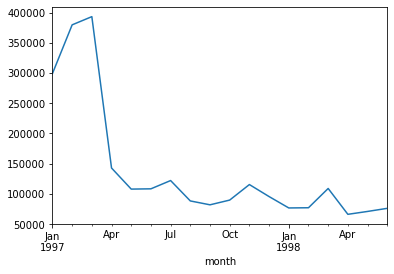

In [118]:
# plt.plot(df.groupby(by="month")["order_amount"].sum())
df.groupby(by=["month"])["order_amount"].sum().plot()

<AxesSubplot:xlabel='month'>

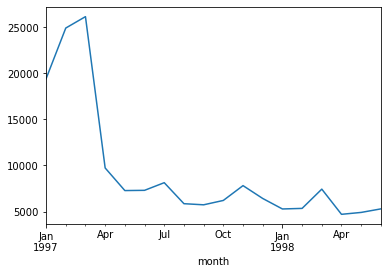

In [119]:
# 所有用户每月的产品购买量
df.groupby(by=["month"])["order_product"].sum().plot()

In [120]:
# 所有用户每月的消费总次数(原始数据中的一行数据表示一次消费记录)
df.groupby(by=["month"])["user_id"].count()

month
1997-01-01     8928
1997-02-01    11272
1997-03-01    11598
1997-04-01     3781
1997-05-01     2895
1997-06-01     3054
1997-07-01     2942
1997-08-01     2320
1997-09-01     2296
1997-10-01     2562
1997-11-01     2750
1997-12-01     2504
1998-01-01     2032
1998-02-01     2026
1998-03-01     2793
1998-04-01     1878
1998-05-01     1985
1998-06-01     2043
Name: user_id, dtype: int64

In [121]:
# 统计每月的消费人数(可能同一天一个用户会消费多次) nunique表示统计去重后的个数
df.groupby(by=["month"])["user_id"].nunique()

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_id, dtype: int64

### 第三部分：用户个体消费数据分析
- 用户消费总金额和消费总次数的统计描述
- 用户消费金额和消费产品数量的散点图
- 各个用户消费总金额的直方分布图(消费金额在1000之内的分布)
- 各个用户消费的总数量的直方分布图(消费商品的数量在100次之内的分布)

In [122]:
# 用户消费总金额和消费总次数的统计描述
df.groupby(by=["user_id"])["order_amount"].sum() # 每一个用户消费的总金额

user_id
1         11.77
2         89.00
3        156.46
4        100.50
5        385.61
          ...  
23566     36.00
23567     20.97
23568    121.70
23569     25.74
23570     94.08
Name: order_amount, Length: 23570, dtype: float64

In [123]:
# 每一个用户消费的总次数
df.groupby(by=["user_id"]).count()["order_dt"]

user_id
1         1
2         2
3         6
4         4
5        11
         ..
23566     1
23567     1
23568     3
23569     1
23570     2
Name: order_dt, Length: 23570, dtype: int64

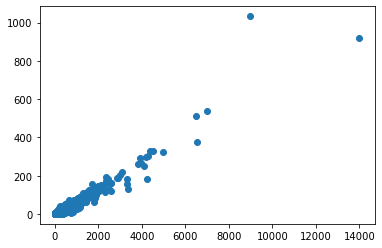

In [124]:
# 用户消费金额和消费产品数量的散点图
user_amount_sum = df.groupby(by=["user_id"])["order_amount"].sum()
user_product_sum = df.groupby(by=["user_id"])["order_product"].sum()
plt.scatter(user_amount_sum, user_product_sum)

<AxesSubplot:>

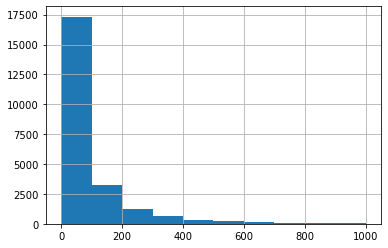

In [125]:
# 各个用户消费总金额的直方分布图(消费金额在1000之内的分布)
df.groupby(by=["user_id"]).sum().query("order_amount <= 1000")["order_amount"]
df.groupby(by=["user_id"]).sum().query("order_amount <= 1000")["order_amount"].hist()

<AxesSubplot:>

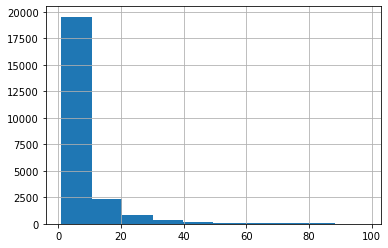

In [126]:
# 各个用户消费的总数量的直方分布图(消费商品的数量在100次之内的分布)
df.groupby(by=["user_id"]).sum().query("order_product <= 100")["order_product"].hist()

### 第四部分：用户消费行为分析
- 用户第一次消费的月份分布，和人数统计
    - 绘制线形图
- 用户最后一次消费的时间分布，和人数统计
    - 绘制线形图
- 新老客户的占比
    - 消费一次为新用户
    - 消费多次为老用户
        - 分析出每一个用户的第一个消费和最后一次消费的时间
            - agg(["func1","func2"]):对分组后的结果进行指定聚合
        - 分析出新老客户的消费比例
- 用户分层
    - 分析得出每个用户的总购买量和总消费金额and最近一次消费的时间的表格rfm
    - RFM模型设计
        - R表示客户最近一次交易时间的间隔。
            - /np.timedelta64(1,"D")：去除days
        - F表示客户购买商品的总数量,F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。
        - M表示客户交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。
        - 将R，F，M作用到rfm表中
    - 根据价值分层，将用户分为：
        - 重要价值客户
        - 重要保持客户
        - 重要挽留客户
        - 重要发展客户
        - 一般价值客户
        - 一般保持客户
        - 一般挽留客户
        - 一般发展客户
            - 使用已有的分层模型即可rfm_func

In [127]:
# 用户第一次消费的月份分布，和人数统计
# 第一次消费的月份：每一个用户消费月份的最小值就是该用户第一次消费的月份
df.groupby(by=["user_id"])["month"].min()

user_id
1       1997-01-01
2       1997-01-01
3       1997-01-01
4       1997-01-01
5       1997-01-01
           ...    
23566   1997-03-01
23567   1997-03-01
23568   1997-03-01
23569   1997-03-01
23570   1997-03-01
Name: month, Length: 23570, dtype: datetime64[ns]

<AxesSubplot:>

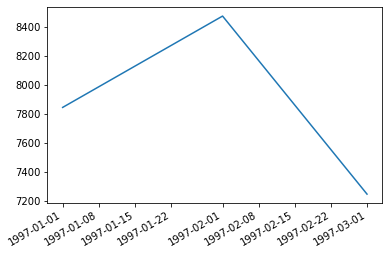

In [128]:
df.groupby(by=["user_id"])["month"].min().value_counts() # 人数的统计
df.groupby(by=["user_id"])["month"].min().value_counts().plot()

<AxesSubplot:>

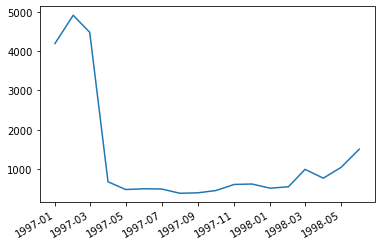

In [129]:
# 用户最后一次消费的时间分布，和人数统计
# 用户消费月份的最大值就是用户最后一次消费的月份
df.groupby(by=["user_id"])["month"].max()
df.groupby(by=["user_id"])["month"].max().value_counts() # 人数的统计
df.groupby(by=["user_id"])["month"].max().value_counts().plot()

In [130]:
# 新老客户的占比
# 消费一次为新用户，消费多次为老用户
# 如何获知用户是否为第一次消费？可以根据用户的消费时间进行判定？
# 如果用户的第一次消费时间和最后一次消费时间一样，则该用户只消费了一次为新用户，否则为老用户
new_old_user_df = df.groupby(by=["user_id"])["order_dt"].agg(["min", "max"])
new_old_user_df["min"] == new_old_user_df["max"] # True新用户，False老用户
# 统计True和False的个数
(new_old_user_df["min"] == new_old_user_df["max"]).value_counts()

True     12054
False    11516
dtype: int64

In [131]:
# 分析得出每个用户的总购买量和总消费金额and最近一次消费的时间的表格rfm
rfm = df.pivot_table(index="user_id", aggfunc={"order_product":"sum", "order_amount": "sum", "order_dt": "max"})
rfm

,order_amount,order_dt,order_product
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29
...,...,...,...
23566,36.00,1997-03-25,2
23567,20.97,1997-03-25,1
23568,121.70,1997-04-22,6


In [132]:
# R表示客户最近一次交易时间的间隔
max_dt = df["order_dt"].max() # 计算最大时间
# 每一个用户最后一次交易的时间
-(df.groupby(by=["user_id"])["order_dt"].max() - max_dt)
rfm["R"] = -(df.groupby(by=["user_id"])["order_dt"].max() - max_dt) / np.timedelta64(1, "D") # 计算时间间隔

In [133]:
rfm.drop(labels=["order_dt"], axis=1, inplace=True)

In [134]:
rfm.columns = ["M","F","R"]
rfm.head()

,M,F,R
user_id,,,
1,11.77,1,545.0
2,89.00,6,534.0
3,156.46,16,33.0
4,100.50,7,200.0
5,385.61,29,178.0


In [ ]:
def rfm_func(x):
    # 存储存储的是三个字符串形式的0或者1
    level = x.map(lambda x: "1" if x > 0 else "0")
    label = level.R + level.F + level.M
    d = {
        "111":"重要价值客户",
        "011":"重要保持客户",
        "101":"重要挽留客户",
        "001":"重要发展客户",
        "110":"一般价值客户",
        "010":"一般保持客户",
        "100":"一般挽留客户",
        "000":"一般发展客户"
    }
    result = d[label]
    return result
# df.apply(func):可以对df中的行或者列进行某种（func）形式的运算
rfm["label"] = rfm.apply(lambda x: x - x.mean()).apply(rfm_func, axis=1)
rfm.head()

,M,F,R,label
user_id,,,,
1,11.77,1,545.0,一般挽留客户
2,89.00,6,534.0,一般挽留客户
3,156.46,16,33.0,重要保持客户
4,100.50,7,200.0,一般发展客户
5,385.61,29,178.0,重要保持客户


### 第五部分：用户的生命周期
- 将用户划分为活跃用户和其他用户
    - 统计每个用户每个月的消费次数
    - 统计每个用户每个月是否消费，消费记录为1否则记录为0
        - 知识点：DataFrame的apply和applymap的区别
            - applymap:返回df
            - 将函数做用于DataFrame中的所有元素(elements)
            - apply:返回Series
            - apply()将一个函数作用于DataFrame中的每个行或者列
    - 将用户按照每一个月份分成：
        - unreg:观望用户（前两月没买，第三个月才第一次买,则用户前两个月为观望用户）
        - unactive:首月购买后，后序月份没有购买则在没有购买的月份中该用户的为非活跃用户
        - new:当前月就进行首次购买的用户在当前月为新用户
        - active:连续月份购买的用户在这些月中为活跃用户
        - return:购买之后间隔n月再次购买的第一个月份为该月份的回头客

In [141]:
# 统计每个用户每个月的消费次数
user_month_count_of = df.pivot_table(index=["user_id"], values="order_dt", aggfunc="count", columns="month").fillna(0)
user_month_count_of.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [142]:
# 统计每个用户每个月是否消费，消费记录为1否则记录为0
df_purchase = user_month_count_of.applymap(lambda x: 1 if x >= 1 else 0)
df_purchase.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [143]:
# 将df_purchase中的原始数据0和1修改为new，unactive......,返回新的df叫做df_purchase_new
# 固定算法
def active_status(data):
    status = [] # 某个用户每一个月的活跃度
    for i in range(18):
        # 若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        
        # 若本月消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status

pivoted_status = df_purchase.apply(active_status, axis=1)
pivoted_status.head()

user_id
1    [new, unactive, unactive, unactive, unactive, ...
2    [new, unactive, unactive, unactive, unactive, ...
3    [new, unactive, return, active, unactive, unac...
4    [new, unactive, unactive, unactive, unactive, ...
5    [new, active, unactive, return, active, active...
dtype: object

In [ ]:
df_purchase_new = DataFrame(data=pivoted_status.values.tolist(), index=df_purchase.index, columns=df_purchase.columns)
df_purchase_new.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


- 每月【不同活跃】用户的计数
    - purchase_status_ct = df_purchase_new.apply(lambda x : pd.value_counts(x)).fillna(0)
    - 转置进行最终结果的查看

In [145]:
purchase_status_ct = df_purchase_new.apply(lambda x: pd.value_counts(x)).fillna(0)
purchase_status_ct

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,0.0,1157.0,1681.0,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
return,0.0,0.0,595.0,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,0.0,6689.0,14046.0,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0
unreg,15724.0,7248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
purchase_status_ct.T

,active,new,return,unactive,unreg
month,,,,,
1997-01-01,0.0,7846.0,0.0,0.0,15724.0
1997-02-01,1157.0,8476.0,0.0,6689.0,7248.0
1997-03-01,1681.0,7248.0,595.0,14046.0,0.0
1997-04-01,1773.0,0.0,1049.0,20748.0,0.0
1997-05-01,852.0,0.0,1362.0,21356.0,0.0
1997-06-01,747.0,0.0,1592.0,21231.0,0.0
1997-07-01,746.0,0.0,1434.0,21390.0,0.0
1997-08-01,604.0,0.0,1168.0,21798.0,0.0
1997-09-01,528.0,0.0,1211.0,21831.0,0.0
